In [2]:
import sqlite3 as sql
import pandas as pd

def run_query(q):
    with sql.connect('chinook.db') as conn:
        result=pd.read_sql(q,conn)
        return result
    
def run_command(c):
    with sql.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

def show_table(c):
    table=run_query(c)
    return table
    
query= "select name,type from sqlite_master;"
    
show_table(query)

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


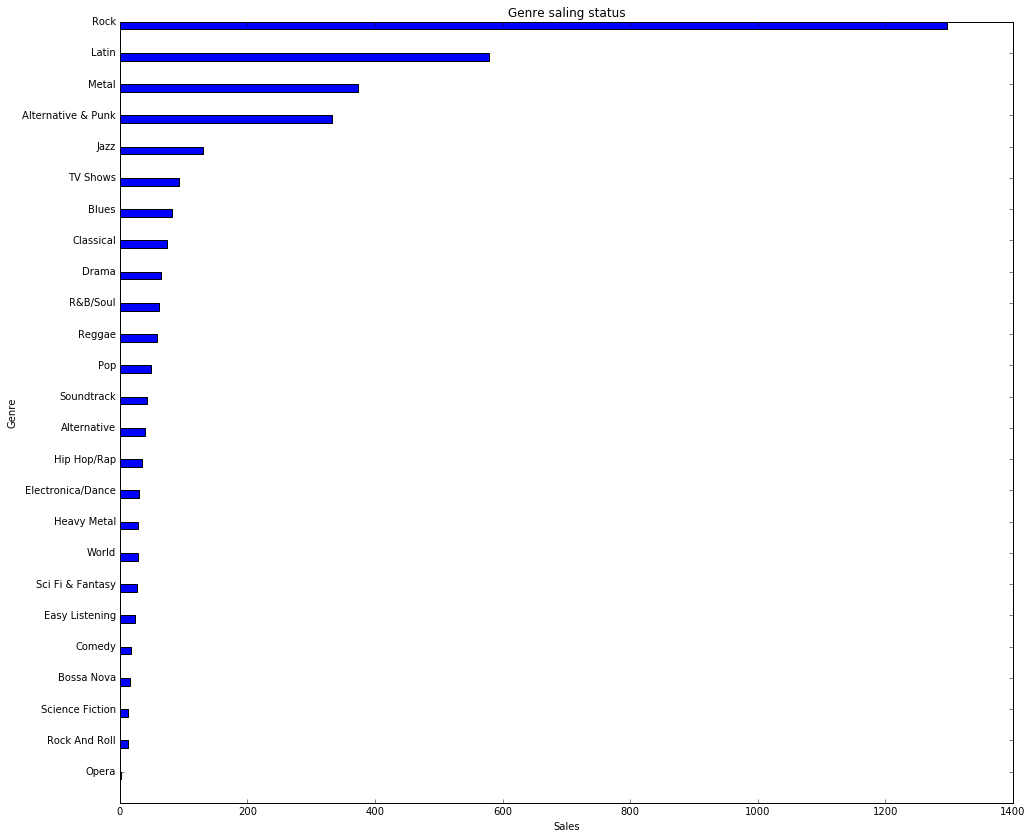

In [3]:
%matplotlib inline
from numpy import arange
import matplotlib.pyplot as plt

query='select g.name Genre, COUNT(t.track_id) quality from track t inner join genre g on g.genre_id = t.genre_id group by 1'
genre_sales_usa=run_query(query)
genre_sales_usa=genre_sales_usa.sort_values(by=['quality'])
genre_sales_usa

columns=genre_sales_usa['Genre']
fig,ax=plt.subplots(figsize=(16,14))

height=genre_sales_usa['quality'].values
bar_position=arange(len(columns))+ 0.75
ax.barh(bar_position, height, 0.25)

tick_position=range(1,len(columns)+1)
ax.set_yticks(tick_position)
ax.set_yticklabels(columns)
plt.xlabel('Sales')
plt.ylabel('Genre')
plt.title('Genre saling status')

plt.show()

#Rock takes the first place in this ranking and its saling performance is more than two times than that of Latin, which 
#takes the second place.
#according to the picture, my recommendation is to buy Punk genre and Bules


In [4]:
%matplotlib inline
from numpy import arange
import matplotlib.pyplot as plt

query='select g.name Genre, COUNT(t.track_id) quality from track t inner join genre g on g.genre_id = t.genre_id group by 1'
genre_sales_usa=run_query(query)

genre_sales_usa=genre_sales_usa.sort_values(by=['quality'], ascending= False)
genre_sales_usa

,Genre,quality
18,Rock,1297
12,Latin,579
13,Metal,374
1,Alternative & Punk,332
11,Jazz,130
23,TV Shows,93
2,Blues,81
4,Classical,74
6,Drama,64
16,R&B/Soul,61


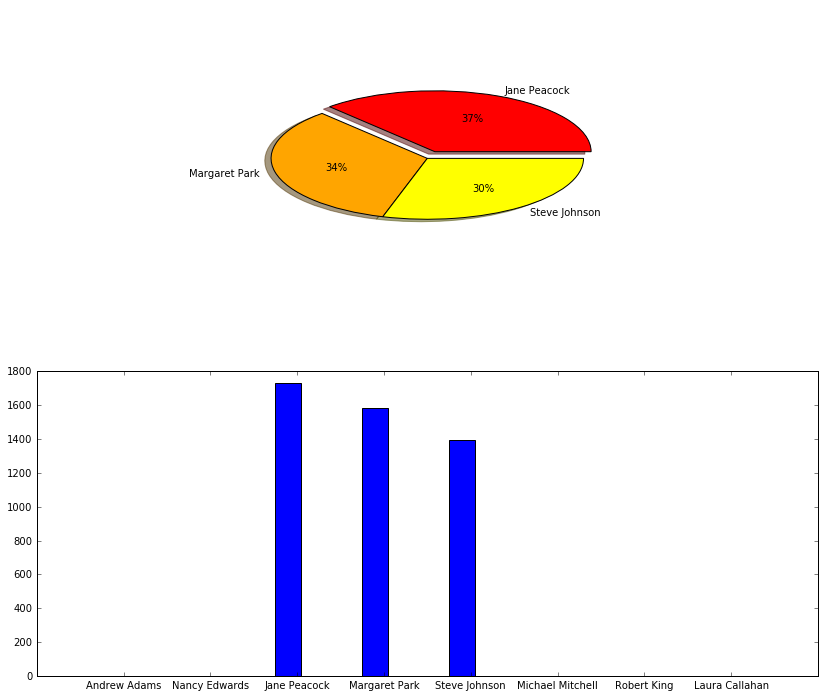

In [5]:
#the query indicates that finds the total dollar amount of sales assigned to each sales support agent within the company. 
query="select e.employee_id, (e.first_name || ' ' || e.last_name) employee_name, SUM(i.total) total_purchased from employee e LEFT JOIN customer c ON c.support_rep_id=e.employee_id LEFT JOIN invoice i ON i.customer_id=c.customer_id GROUP BY 1 ORDER BY 1"
employee=run_query(query)

#replacing missing values with 0 
employee_clean= employee.fillna(0)
employee_clean

#visualling the table 
#with a pie chart
fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

labels= employee_clean['employee_name'][2:5].values
fracs = employee_clean['total_purchased'][2:5].values
explode = (0.06, 0, 0)
ax1.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True, radius=0.5, colors=['red','orange', 'yellow'])

#with a bar chart
bar_height= employee_clean['total_purchased'].values
bar_label= employee_clean['employee_name'].values
bar_position= arange(len(bar_label))+0.75
ax2.bar(bar_position, bar_height, width=0.3)

tick_position=range(1,len(bar_label)+1)
ax2.set_xticks(tick_position)
ax2.set_xticklabels(bar_label)
plt.show()

#both of charts shows only three sales support engineer did good job, all customers purchase belong to these three perople. 
#in these three engineer, Jane Peacock sales cover the most percentage with 37% and Margaret Park who possesses the second place
#have a percentage of 34.
#but in total there are 8 sales enginners and that means the rest 5 engineers never got a chance for some reasons
#



In [6]:
q='''
        SELECT 
            c.country Country, 
            COUNT(c.customer_id) total_customer, 
            SUM(i.total) total_sales, 
            (SUM(i.total) /COUNT(c.customer_id)) average_order_value
        FROM customer c 
        LEFT JOIN invoice i ON i.customer_id=c.customer_id 
        GROUP BY 1
        ORDER BY total_sales DESC; 
        '''
table_country=run_query(q)
table_country


,Country,total_customer,total_sales,average_order_value
0,USA,131,1040.49,7.942672
1,Canada,76,535.59,7.047237
2,Brazil,61,427.68,7.011148
3,France,50,389.07,7.781400
4,Germany,41,334.62,8.161463
5,Czech Republic,30,273.24,9.108000
6,United Kingdom,28,245.52,8.768571
7,Portugal,29,185.13,6.383793
8,India,21,183.15,8.721429
9,Ireland,13,114.84,8.833846


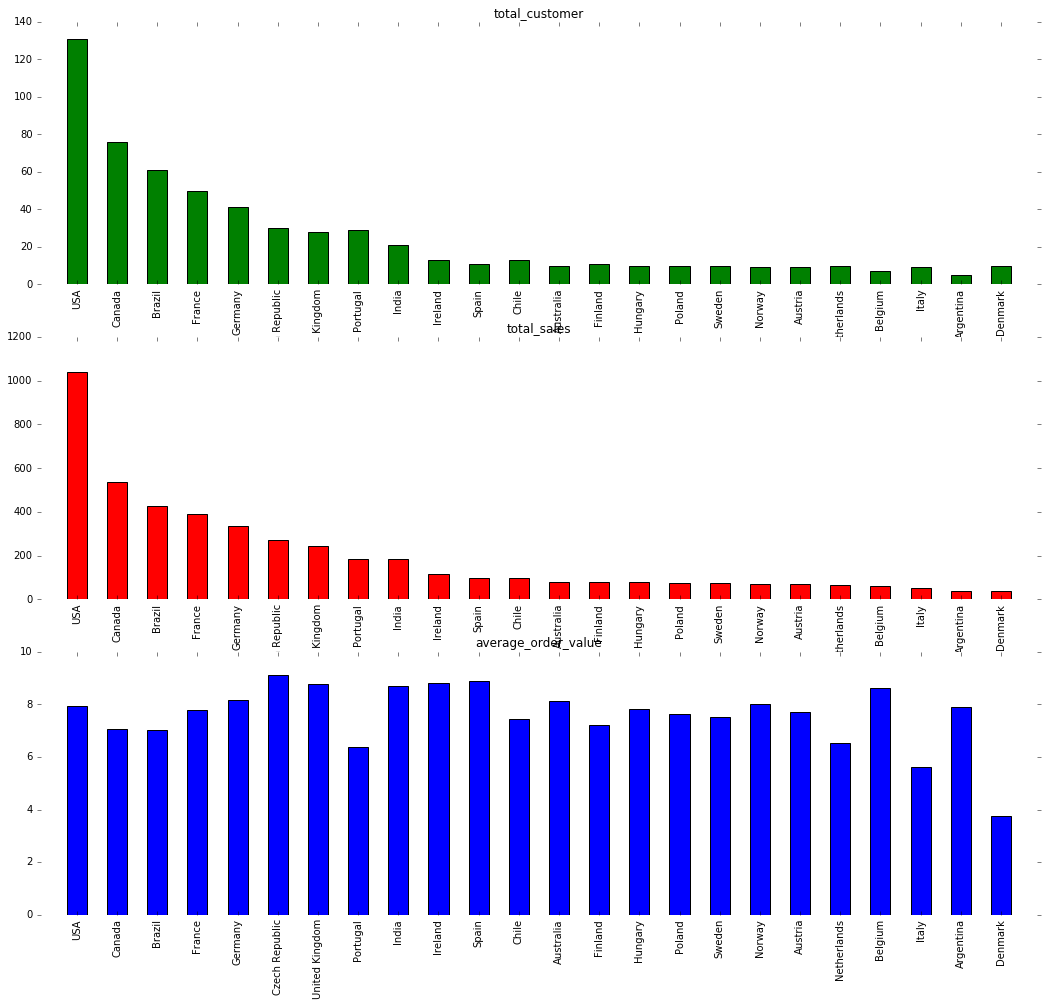

In [7]:

columns=[ 'total_customer', 'total_sales', 'average_order_value']
xlabel=table_country['Country'].values
colors=['Green', 'Red', 'Blue']
div=[0, 0.5, 1]
position=arange(len(xlabel))+0.75

tick_positions=range(1, len(xlabel)+1)
fig=plt.figure(figsize=(18,16))

for i in range(3):
    ax=fig.add_subplot(3,1,i+1)
    ax.bar(position, table_country[columns[i]].values, width=0.5, color=colors[i])
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(xlabel, rotation=90)
    ax.set_title(columns[i])
    for key, value in ax.spines.items():
        ax.spines[key].set_visible(False)

plt.show()


In [8]:
q=''' 
CREATE VIEW purchased_tracks AS
    SELECT a.title album,
        il.track_id,
        i.invoice_id,
        t.name track_name
        
    FROM invoice i 
    INNER JOIN invoice_line il ON il.invoice_id=i.invoice_id
    INNER JOIN track t ON t.track_id=il.track_id
    INNER JOIN album a ON a.album_id=t.album_id

    ORDER BY 4 

        '''

run_command(q)
#create table which indicates the tracks that has been purchased



OperationalError: table purchased_tracks already exists

In [9]:
q2= ''' 
CREATE VIEW tracks_album AS
    SELECT a.title album_name,
        t.track_id,
        t.name track_name
    FROM album a
    LEFT JOIN track t ON t.album_id=a.album_id
    ORDER BY 1
        '''
run_command(q2)
#create table that includes all tracks 


OperationalError: table tracks_album already exists

In [10]:
query2="SELECT * FROM tracks_album ta"
tracks_album=run_query(query2)
tracks_album



,album_name,track_id,track_name
0,...And Justice For All,1893,Blackened
1,...And Justice For All,1894,...And Justice For All
2,...And Justice For All,1895,Eye Of The Beholder
3,...And Justice For All,1896,One
4,...And Justice For All,1897,The Shortest Straw
5,...And Justice For All,1898,Harvester Of Sorrow
6,...And Justice For All,1899,The Frayed Ends Of Sanity
7,...And Justice For All,1900,To Live Is To Die
8,...And Justice For All,1901,Dyers Eve
9,20th Century Masters - The Millennium Collecti...,3288,Rock You Like a Hurricane


In [11]:
query="SELECT * FROM purchased_tracks pt ORDER BY track_id"
purchased_tracks=run_query(query)
purchased_tracks

,invoice_id,track_id,track_name,album
0,23,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
1,107,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
2,252,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
3,385,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
4,414,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
5,421,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
6,446,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
7,496,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
8,106,2,Balls to the Wall,Balls to the Wall
9,127,2,Balls to the Wall,Balls to the Wall


In [12]:
# To create a table shows the track that is not purchased 
query3='''
        SELECT album_name,track_id,track_name FROM tracks_album
        EXCEPT
        SELECT album,track_id,track_name FROM purchased_tracks
        ORDER BY album_name
        '''
track_id_except=run_query(query3)
track_id_except

,album_name,track_id,track_name
0,...And Justice For All,1893,Blackened
1,...And Justice For All,1894,...And Justice For All
2,...And Justice For All,1895,Eye Of The Beholder
3,...And Justice For All,1898,Harvester Of Sorrow
4,...And Justice For All,1899,The Frayed Ends Of Sanity
5,...And Justice For All,1901,Dyers Eve
6,"A Copland Celebration, Vol. I",3427,Fanfare for the Common Man
7,A Matter of Life and Death,1201,Different World
8,A Matter of Life and Death,1202,These Colours Don't Run
9,A Matter of Life and Death,1203,Brighter Than a Thousand Suns


In [13]:
query4=''' 
CREATE VIEW pur_tracks_counted AS
    SELECT 
        invoice_id, 
        COUNT(track_id) num_tracks_purchased, 
        album 
    FROM purchased_tracks pt GROUP BY 1 ORDER BY album
    '''
run_command(query4)

OperationalError: table pur_tracks_counted already exists

In [14]:
query5=''' 
CREATE VIEW album_tracks_counted AS
    SELECT 
        album_name, 
        COUNT(track_id) num_of_tracks
    FROM tracks_album ta GROUP BY 1 ORDER BY album_name
    '''
run_command(query5)

OperationalError: table album_tracks_counted already exists

In [15]:
query6=''' SELECT * FROM pur_tracks_counted'''
pur_tracks_counted=run_query(query6)
pur_tracks_counted

,invoice_id,num_tracks_purchased,album
0,201,12,20th Century Masters - The Millennium Collecti...
1,317,12,20th Century Masters - The Millennium Collecti...
2,329,1,20th Century Masters - The Millennium Collecti...
3,494,10,20th Century Masters - The Millennium Collecti...
4,398,17,A-Sides
5,334,15,Ace Of Spades
6,57,1,All That You Can't Leave Behind
7,330,13,American Idiot
8,381,13,American Idiot
9,24,12,Appetite for Destruction


In [17]:
query7="SELECT * FROM  album_tracks_counted "
album_tracks_counted=run_query(query7)
album_tracks_counted

,album_name,num_of_tracks
0,...And Justice For All,9
1,20th Century Masters - The Millennium Collecti...,12
2,"A Copland Celebration, Vol. I",1
3,A Matter of Life and Death,11
4,A Real Dead One,12
5,A Real Live One,11
6,A Soprano Inspired,1
7,A TempestadeTempestade Ou O Livro Dos Dias,15
8,A-Sides,17
9,Ace Of Spades,15


In [46]:
query8='''
         SELECT 
             album,
             COUNT(album) purchased_time_single
         FROM (
            SELECT album , num_tracks_purchased FROM pur_tracks_counted
            EXCEPT
            SELECT album_name, num_of_tracks FROM  album_tracks_counted
             )
         GROUP BY 1
         ORDER BY 1
               
        '''
track_id_except=run_query(query8)
track_id_except

,album,purchased_time_single
0,20th Century Masters - The Millennium Collecti...,2
1,All That You Can't Leave Behind,1
2,Are You Experienced?,2
3,B-Sides 1980-1990,2
4,Big Ones,1
5,Blood Sugar Sex Magik,2
6,Cake: B-Sides and Rarities,1
7,Contraband,1
8,Core,2
9,Dark Side Of The Moon,1


In [64]:
query9='''
    CREATE VIEW album_purchased AS
        SELECT 
            album, 
            COUNT(album) purchased_time_total 
        FROM pur_tracks_counted
        GROUP BY 1 
        ORDER BY 1
    '''
run_command(query9)


In [66]:
query10= '''
    CREATE VIEW single_purchased AS
    SELECT 
        album,
        COUNT(album) purchased_time_single
    FROM 
        (
        SELECT album , num_tracks_purchased FROM pur_tracks_counted
        EXCEPT
        SELECT album_name, num_of_tracks FROM  album_tracks_counted
        )
    GROUP BY 1
    ORDER BY 1
            '''
run_command(query10)


In [102]:
query11='''
SELECT ap.album,
    ap.purchased_time_total,
    sp.purchased_time_single
FROM album_purchased ap
LEFT JOIN single_purchased sp ON sp.album = ap.album
ORDER BY 1
'''

#using LEFT join to combine two tables album_purchased and single_purchased
#create table with album, num of total purchased and total single purchased columns

table=run_query(query11)
table_clean=table.fillna(0)
table_clean['purchased_time_single']=table_clean['purchased_time_single'].astype(int)
table_clean['album_purchased']=table_clean['purchased_time_total']-table_clean['purchased_time_single']

#adding a new row named Total and calculating the total number of each column
table_clean.at['Total', 'purchased_time_total'] = table_clean['purchased_time_total'].sum()
table_clean.at['Total', 'purchased_time_single'] = table_clean['purchased_time_single'].sum()
table_clean.at['Total', 'album_purchased'] = table_clean['album_purchased'].sum()
total_column=table_clean.loc['Total']

#categorizes the percentage of album purchase and tracks purchase
table_clean.at['Percentage', 'purchased_time_single']= total_column[2]/total_column[1]
table_clean.at['Percentage', 'album_purchased']=total_column[3]/total_column[1]
table_clean

,album,purchased_time_total,purchased_time_single,album_purchased
0,20th Century Masters - The Millennium Collecti...,4.0,2.000000,2.000000
1,A-Sides,1.0,0.000000,1.000000
2,Ace Of Spades,1.0,0.000000,1.000000
3,All That You Can't Leave Behind,1.0,1.000000,0.000000
4,American Idiot,2.0,0.000000,2.000000
5,Appetite for Destruction,2.0,0.000000,2.000000
6,Are You Experienced?,10.0,2.000000,8.000000
7,Audioslave,1.0,0.000000,1.000000
8,B-Sides 1980-1990,2.0,2.000000,0.000000
9,Bach: The Cello Suites,1.0,0.000000,1.000000


In [ ]:
= table_clean['Total','purchased_time_single']/table_clean['Total','purchased_time_total']